In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob




In [30]:
df = pd.read_csv('reviews.tsv', sep='\t')

In [31]:
df

,permalink,rating,review_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1.0,Уже второй раз забивают на заказ
4,1000095379,5.0,Любимая пиццерия! 👍
...,...,...,...
97407,1754090231,5.0,Очень достойное место. Бифштекс был очень сочн...
97408,1754090231,5.0,Зашли вечером выпить кофе и скушать десерт. Оч...
97409,1754090231,5.0,"Настоящий ресторан, с ресторанной сервировкой ..."
97410,1754090231,5.0,Вкусная еда


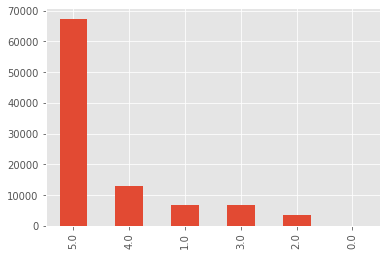

In [32]:
df['rating'].value_counts().plot(kind='bar')

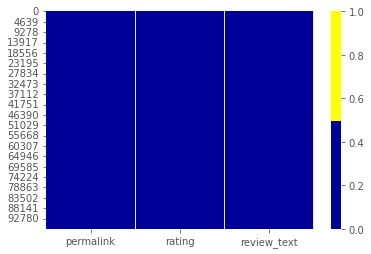

In [33]:
cols = df.columns[:4] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#проверка пустых ячеек - если без желтого, то все данные на месте

In [34]:
df = df.loc[df['rating'] != 0.0]

In [35]:
df

,permalink,rating,review_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1.0,Уже второй раз забивают на заказ
4,1000095379,5.0,Любимая пиццерия! 👍
...,...,...,...
97407,1754090231,5.0,Очень достойное место. Бифштекс был очень сочн...
97408,1754090231,5.0,Зашли вечером выпить кофе и скушать десерт. Оч...
97409,1754090231,5.0,"Настоящий ресторан, с ресторанной сервировкой ..."
97410,1754090231,5.0,Вкусная еда


In [ ]:
#df = df.loc[df['rating'] != 5.0]

In [ ]:
df

,permalink,rating,review_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1.0,Уже второй раз забивают на заказ
4,1000095379,5.0,Любимая пиццерия! 👍
...,...,...,...
328640,245591834558,5.0,Очень вкусная пицца!!!!
328641,245591834558,5.0,"Лучший борщ на Роза Хутор!!! Большая порция, т..."
328642,245591834558,5.0,Все понравилось! Пицца норм
328643,245591834558,1.0,"обслуживание нормальное, соотношение цена/каче..."


In [ ]:
df['review_text'] = df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review_text'] = df['review_text'].str.replace('[^ws]','')

In [ ]:
df['review_text'][2] #для проверки

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41)

In [ ]:
#df[df.rating < 1][['permalink','review_text','rating']]

In [ ]:
df_test

In [ ]:
df_train

,permalink,rating,review_text
4064,1013765233,5.0,Лучшая пицца
197703,97531605719,4.0,"Мне нравиться, но в прошлые года было лучше бо..."
98010,1759890818,4.0,"Уютное кафе, вроде вкусно"
35038,1136270566,2.0,Волшебный ресторан грузинской и кавказской кух...
300893,213380201464,5.0,Отличное место с хорошим обслуживанием. По пон...
...,...,...,...
251052,154862827915,5.0,Иногда кушаем тут с семьей. Национальная кухня...
217140,118063334239,5.0,Заказали пиццу. Доставка пешим курьером очень ...
323582,239806400416,5.0,Вкусно и недорого
132060,25503574169,5.0,Вкусная и не дорогая пица. Часто попадаем на а...


In [36]:
!pip install dostoevsky

     |████████████████████████████████| 68 kB 5.2 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3121434 sha256=2b8ac2c29a2c82e4c21fbd3a0d86b8f81a8876de40e6ac3ebf4af3c581b03f95
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [37]:
!python -m dostoevsky download fasttext-social-network-model

In [ ]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [47]:
df['review_text']

0        Вкусная питца, естт летнее кафе, доставка, при...
1        Думал можно днём с детьми посидеть на открытой...
2        Есть веранда, вкусная пицца, делают по половин...
3                         Уже второй раз забивают на заказ
4                                      Любимая пиццерия! 👍
                               ...                        
97407    Очень достойное место. Бифштекс был очень сочн...
97408    Зашли вечером выпить кофе и скушать десерт. Оч...
97409    Настоящий ресторан, с ресторанной сервировкой ...
97410                                          Вкусная еда
97411    Думаю,что это место украшает город. Обязательн...
Name: review_text, Length: 97366, dtype: object

In [59]:
df.dtypes

permalink       object
rating         float64
review_text     object
dtype: object

In [65]:
df['review_text'] = str(df['review_text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
mess = df['review_text']

In [56]:
#results = model.predict(mess, k=2)

In [68]:
mess

0        0        0        0        0        0        В...
1        0        0        0        0        0        В...
2        0        0        0        0        0        В...
3        0        0        0        0        0        В...
4        0        0        0        0        0        В...
                               ...                        
97407    0        0        0        0        0        В...
97408    0        0        0        0        0        В...
97409    0        0        0        0        0        В...
97410    0        0        0        0        0        В...
97411    0        0        0        0        0        В...
Name: review_text, Length: 97366, dtype: object

In [69]:
results = model.predict(mess, k=2)

In [70]:
for message, sentiment in zip(mess, results):
    # привет -> {'speech': 1.0000100135803223, 'skip': 0.0020607432816177607}
    # люблю тебя!! -> {'positive': 0.9886782765388489, 'skip': 0.005394937004894018}
    # малолетние дебилы -> {'negative': 0.9525841474533081, 'neutral': 0.13661839067935944}]
    print(message, '->', sentiment)

Выходные данные были обрезаны до нескольких последних строк (5000).
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная п

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусная пи...
97409    0        0        0        0        Вкусная пи...
97410    0        0        0        0        Вкусная пи...
97411    0        0        0        0        Вкусная пи...
Name: review_text, Length: 97366, dtype: object -> {'neutral': 0.7663036584854126, 'positive': 0.4688006341457367}
0        0        0        0        0        Вкусная пи...
1        0        0        0        0        Вкусная пи...
2        0        0        0        0        Вкусная пи...
3        0        0        0        0        Вкусная пи...
4        0        0        0        0        Вкусная пи...
                               ...                        
97407    0        0        0        0        Вкусная пи...
97408    0        0        0        0        Вкусн

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [49]:
messages_2 = [
    'привет',
    'я люблю тебя!!',
    'малолетние дебилы'
]

In [50]:

results = model.predict(messages_2, k=2)

for message, sentiment in zip(messages_2, results):
    # привет -> {'speech': 1.0000100135803223, 'skip': 0.0020607432816177607}
    # люблю тебя!! -> {'positive': 0.9886782765388489, 'skip': 0.005394937004894018}
    # малолетние дебилы -> {'negative': 0.9525841474533081, 'neutral': 0.13661839067935944}]
    print(message, '->', sentiment)

привет -> {'speech': 1.0000100135803223, 'skip': 0.0020607432816177607}
я люблю тебя!! -> {'positive': 0.9886782765388489, 'skip': 0.005394937004894018}
малолетние дебилы -> {'negative': 0.9525841474533081, 'neutral': 0.13661839067935944}


In [ ]:
#отбираем данные для предикторов, удаляя два последних столбца, индекс не включается в данные.
X = pd.DataFrame(df_train.drop(['permalink', 'rating'], axis=1))

In [ ]:
X

,review_text
4064,Лучшая пицца
197703,"Мне нравиться, но в прошлые года было лучше бо..."
98010,"Уютное кафе, вроде вкусно"
35038,Волшебный ресторан грузинской и кавказской кух...
300893,Отличное место с хорошим обслуживанием. По пон...
...,...
251052,Иногда кушаем тут с семьей. Национальная кухня...
217140,Заказали пиццу. Доставка пешим курьером очень ...
323582,Вкусно и недорого
132060,Вкусная и не дорогая пица. Часто попадаем на а...


In [ ]:
#указываем столбец отклика
y = pd.DataFrame(df_train['rating'])

In [ ]:
y

,rating
4064,5.0
197703,4.0
98010,4.0
35038,2.0
300893,5.0
...,...
251052,5.0
217140,5.0
323582,5.0
132060,5.0


In [ ]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#обучение модели
reg = LinearRegression().fit(X, y)

In [ ]:
#предсказание для конфет введеных вручную
reg.predict([[1, 1, 1, 0, 1, 0, 1, 1, 1, 0.669, 0.456]])

In [ ]:
#предсказание для конфет из таблицы

#выбираем строку из таблицы
AirHeads = DATA.loc['Air Heads',:].to_frame().T

#отбираем данные для предикторов и выполняем предсказание с помощью модели
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

Значение коэффициента $\theta_0$: